# intro to scikit learn


* 0.end to end scikitlearn workflow,
* 1.getting the data ready,
* 2.choose the right estimator/algorithm for our problems,
* 3.fit the model/algorithm and use it to make prediction on our data,
* 4.evaluating the model,
* 5.improve the model,
* 6.save and load a trained model,
* 7.put it all together

In [14]:
import numpy as np

In [15]:
import pandas as pd
heart=pd.read_csv("heart-diseases.csv")
heart.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [8]:
#create x
x=heart.drop("target",axis=1)
x.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2


In [9]:
#create y
y=heart["target"]
y.head()

0    1
1    1
2    1
3    1
4    1
Name: target, dtype: int64

In [10]:
#optional warning showing code but doesn't work because the required version is installed already
import warnings
warnings.filterwarnings("ignore")
#choose the right model and hyperparamaeter
from sklearn.ensemble import RandomForestClassifier
clf=RandomForestClassifier()
clf.get_params()


{'bootstrap': True,
 'ccp_alpha': 0.0,
 'class_weight': None,
 'criterion': 'gini',
 'max_depth': None,
 'max_features': 'auto',
 'max_leaf_nodes': None,
 'max_samples': None,
 'min_impurity_decrease': 0.0,
 'min_impurity_split': None,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'n_estimators': 100,
 'n_jobs': None,
 'oob_score': False,
 'random_state': None,
 'verbose': 0,
 'warm_start': False}

In [16]:
#fit the model to the data
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2)


In [112]:
clf.fit(x_train,y_train)#for optional warning this code is recomplied

C:\Users\hp\Desktop\sample_project\env\lib\site-packages\sklearn\svm\_base.py:946: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn("Liblinear failed to converge, increase "


LinearSVC(C=1.0, class_weight=None, dual=True, fit_intercept=True,
          intercept_scaling=1, loss='squared_hinge', max_iter=1000000,
          multi_class='ovr', penalty='l2', random_state=None, tol=0.0001,
          verbose=0)

In [111]:
x_train.shape,y_train.shape

((242, 13), (242,))

# make prediction

In [19]:
y_preds=clf.predict(x_test)
y_preds

array([0, 0, 1, 0, 1, 1, 1, 0, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1,
       0, 1, 0, 0, 0, 0, 1, 1, 1, 1, 0, 1, 1, 0, 1, 0, 1, 1, 0, 1, 0, 0,
       1, 0, 0, 1, 1, 0, 0, 0, 1, 1, 1, 1, 1, 0, 1, 0, 1], dtype=int64)

In [14]:
np.array(y_test)

array([0, 0, 1, 0, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 1, 1, 0, 0, 0, 1, 0,
       0, 1, 1, 0, 0, 1, 0, 1, 1, 0, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0], dtype=int64)

In [15]:
# evaluate the model
clf.score(x_train,y_train)


1.0

In [16]:
clf.score(x_test,y_test)

0.8524590163934426

In [20]:
from sklearn.metrics import classification_report,confusion_matrix,accuracy_score
print(classification_report(y_test,y_preds))
confusion_matrix(y_test,y_preds)
accuracy_score(y_test,y_preds)

              precision    recall  f1-score   support

           0       0.80      0.74      0.77        27
           1       0.81      0.85      0.83        34

    accuracy                           0.80        61
   macro avg       0.80      0.80      0.80        61
weighted avg       0.80      0.80      0.80        61



0.8032786885245902

In [18]:
#improve a model
np.random.seed(42)
for i in range(10,100,10):
    print(f"Trying model with {i} estimator")
    clf=RandomForestClassifier()
    clf.fit(x_train,y_train)
    print(f"model accuracy on the test set:{clf.score(x_test,y_test)*100:2f}%")
    print(" ")

Trying model with 10 estimator
model accuracy on the test set:83.606557%
 
Trying model with 20 estimator
model accuracy on the test set:81.967213%
 
Trying model with 30 estimator
model accuracy on the test set:81.967213%
 
Trying model with 40 estimator
model accuracy on the test set:81.967213%
 
Trying model with 50 estimator
model accuracy on the test set:81.967213%
 
Trying model with 60 estimator
model accuracy on the test set:83.606557%
 
Trying model with 70 estimator
model accuracy on the test set:83.606557%
 
Trying model with 80 estimator
model accuracy on the test set:78.688525%
 
Trying model with 90 estimator
model accuracy on the test set:80.327869%
 


In [113]:
x_train.shape,y_train.shape

((242, 13), (242,))

In [20]:
#save a model and load
import pickle
pickle.dump(clf,open("rfm.pkl","wb"))

In [21]:
loaded_model=pickle.load(open("rfm.pkl","rb"))
loaded_model.score(x_test,y_test)

0.8524590163934426

# optional debugging warning in jupyter

In [22]:
#open terminal and follow the steps

# getting your data ready splitting

In [29]:
#standard import
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
heart.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [24]:
x=heart.drop("target",axis=1)
x.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2


In [25]:
y=heart["target"]
y.head()

0    1
1    1
2    1
3    1
4    1
Name: target, dtype: int64

In [26]:
#split the data into trainin and test
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2)


In [27]:
x_train.shape,x_test.shape,y_train.shape,y_test.shape

((242, 13), (61, 13), (242,), (61,))

In [28]:
x.shape[0]*0.8

242.4

In [29]:
len(heart)

303

# getting your data ready to convert data into numerical

In [169]:
car_sales=pd.read_csv("car-sales.csv")
car_sales.head()

,Make,Colour,Odometer (KM),Doors,Price
0,Toyota,White,150043,4,"$4,000.00"
1,Honda,Red,87899,4,"$5,000.00"
2,Toyota,Blue,32549,3,"$7,000.00"
3,BMW,Black,11179,5,"$22,000.00"
4,Nissan,White,213095,4,"$3,500.00"


In [170]:
x=car_sales.drop("Price",axis=1)
x.head()

,Make,Colour,Odometer (KM),Doors
0,Toyota,White,150043,4
1,Honda,Red,87899,4
2,Toyota,Blue,32549,3
3,BMW,Black,11179,5
4,Nissan,White,213095,4


In [171]:
y=car_sales["Price"]
y.head()

0     $4,000.00
1     $5,000.00
2     $7,000.00
3    $22,000.00
4     $3,500.00
Name: Price, dtype: object

In [172]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2)

In [173]:
#build machine learning model
from sklearn.ensemble import RandomForestRegressor
model=RandomForestRegressor()
model.fit(x_train,y_train)
model.score(x_test,y_test)

ValueError: could not convert string to float: 'Toyota'

In [175]:
#string to numerical
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer
categorical_features=["Make","Colour","Doors"]
one_hot=OneHotEncoder()
transformer=ColumnTransformer([("one_hot",one_hot,categorical_features)],remainder="passthrough")
transformed_x=transformer.fit_transform(x)
transformed_x



array([[0.00000e+00, 0.00000e+00, 0.00000e+00, 1.00000e+00, 0.00000e+00,
        0.00000e+00, 0.00000e+00, 0.00000e+00, 1.00000e+00, 0.00000e+00,
        1.00000e+00, 0.00000e+00, 1.50043e+05],
       [0.00000e+00, 1.00000e+00, 0.00000e+00, 0.00000e+00, 0.00000e+00,
        0.00000e+00, 0.00000e+00, 1.00000e+00, 0.00000e+00, 0.00000e+00,
        1.00000e+00, 0.00000e+00, 8.78990e+04],
       [0.00000e+00, 0.00000e+00, 0.00000e+00, 1.00000e+00, 0.00000e+00,
        1.00000e+00, 0.00000e+00, 0.00000e+00, 0.00000e+00, 1.00000e+00,
        0.00000e+00, 0.00000e+00, 3.25490e+04],
       [1.00000e+00, 0.00000e+00, 0.00000e+00, 0.00000e+00, 1.00000e+00,
        0.00000e+00, 0.00000e+00, 0.00000e+00, 0.00000e+00, 0.00000e+00,
        0.00000e+00, 1.00000e+00, 1.11790e+04],
       [0.00000e+00, 0.00000e+00, 1.00000e+00, 0.00000e+00, 0.00000e+00,
        0.00000e+00, 0.00000e+00, 0.00000e+00, 1.00000e+00, 0.00000e+00,
        1.00000e+00, 0.00000e+00, 2.13095e+05],
       [0.00000e+00, 0.00000e+

In [36]:
#one way more
dummies=pd.get_dummies(car_sales[["Make","Colour","Doors"]])
dummies

,Doors,Make_BMW,Make_Honda,Make_Nissan,Make_Toyota,Colour_Black,Colour_Blue,Colour_Green,Colour_Red,Colour_White
0,4,0,0,0,1,0,0,0,0,1
1,4,0,1,0,0,0,0,0,1,0
2,3,0,0,0,1,0,1,0,0,0
3,5,1,0,0,0,1,0,0,0,0
4,4,0,0,1,0,0,0,0,0,1
5,4,0,0,0,1,0,0,1,0,0
6,4,0,1,0,0,0,1,0,0,0
7,4,0,1,0,0,0,1,0,0,0
8,4,0,0,0,1,0,0,0,0,1
9,4,0,0,1,0,0,0,0,0,1


In [176]:
#lets refit the model
np.random.seed(42)
y=car_sales["Price"].str.replace('[\$\,\.]','')
x_train,x_test,y_train,y_test=train_test_split(transformed_x,y,test_size=0.2)
model.fit(x_train,y_train)
model.score(x_test,y_test)

-1.2378662399999998

# getting data ready for handling data with pandas

In [177]:
import pandas as pd
car_missing=pd.read_csv("car-data.csv")
car_missing.head(10)

,Make,Colour,Odometer (KM),Doors,Price
0,Honda,White,45.0,4.0,15323.0
1,BMW,Blue,67.0,5.0,19943.0
2,Honda,White,234.0,4.0,28343.0
3,Toyota,White,34555.0,4.0,13434.0
4,Nissan,Blue,56.0,3.0,14043.0
5,Honda,Red,NaN,4.0,23883.0
6,Toyota,Blue,163453.0,4.0,8473.0
7,Honda,White,NaN,4.0,20306.0
8,NaN,White,130538.0,4.0,9374.0
9,Honda,Blue,51029.0,4.0,26683.0


In [178]:
car_missing.isna().sum()

Make             49
Colour           50
Odometer (KM)    58
Doors            50
Price            50
dtype: int64

In [179]:
x=car_missing.drop("Price",axis=1)
y=car_missing["Price"]
car_missing.head(10)

,Make,Colour,Odometer (KM),Doors,Price
0,Honda,White,45.0,4.0,15323.0
1,BMW,Blue,67.0,5.0,19943.0
2,Honda,White,234.0,4.0,28343.0
3,Toyota,White,34555.0,4.0,13434.0
4,Nissan,Blue,56.0,3.0,14043.0
5,Honda,Red,NaN,4.0,23883.0
6,Toyota,Blue,163453.0,4.0,8473.0
7,Honda,White,NaN,4.0,20306.0
8,NaN,White,130538.0,4.0,9374.0
9,Honda,Blue,51029.0,4.0,26683.0


In [180]:
#fill missing data with pandas
car_missing["Make"].fillna("missing",inplace=True)
car_missing["Colour"].fillna("missing",inplace=True)
car_missing["Doors"].fillna(4,inplace=True)
car_missing["Odometer (KM)"].fillna(car_missing["Odometer (KM)"].mean(),inplace=True)


In [181]:
car_missing.head(10)

,Make,Colour,Odometer (KM),Doors,Price
0,Honda,White,45.000000,4.0,15323.0
1,BMW,Blue,67.000000,5.0,19943.0
2,Honda,White,234.000000,4.0,28343.0
3,Toyota,White,34555.000000,4.0,13434.0
4,Nissan,Blue,56.000000,3.0,14043.0
5,Honda,Red,130573.257962,4.0,23883.0
6,Toyota,Blue,163453.000000,4.0,8473.0
7,Honda,White,130573.257962,4.0,20306.0
8,missing,White,130538.000000,4.0,9374.0
9,Honda,Blue,51029.000000,4.0,26683.0


In [182]:
#remove rows with missing values
car_missing.dropna(inplace=True)
car_missing.isna().sum()

Make             0
Colour           0
Odometer (KM)    0
Doors            0
Price            0
dtype: int64

In [183]:
x=car_missing.drop("Price",axis=1)
y=car_missing["Price"]

# handling missing data with scikit learn

In [184]:
import pandas as pd
car_missing=pd.read_csv("car-data.csv")
car_missing.head(10)

,Make,Colour,Odometer (KM),Doors,Price
0,Honda,White,45.0,4.0,15323.0
1,BMW,Blue,67.0,5.0,19943.0
2,Honda,White,234.0,4.0,28343.0
3,Toyota,White,34555.0,4.0,13434.0
4,Nissan,Blue,56.0,3.0,14043.0
5,Honda,Red,NaN,4.0,23883.0
6,Toyota,Blue,163453.0,4.0,8473.0
7,Honda,White,NaN,4.0,20306.0
8,NaN,White,130538.0,4.0,9374.0
9,Honda,Blue,51029.0,4.0,26683.0


In [185]:
car_missing.isna().sum()

Make             49
Colour           50
Odometer (KM)    58
Doors            50
Price            50
dtype: int64

In [186]:
car_missing.dropna(subset=["Price"],inplace=True)


In [187]:
car_missing.isna().sum()

Make             47
Colour           46
Odometer (KM)    56
Doors            47
Price             0
dtype: int64

In [188]:
x=car_missing.drop("Price",axis=1)
y=car_missing["Price"]

In [189]:
from sklearn.impute import SimpleImputer
from sklearn.compose import ColumnTransformer
cat_imputer=SimpleImputer(strategy="constant",fill_value="missing")
door_imputer=SimpleImputer(strategy="constant",fill_value=4)
num_imputer=SimpleImputer(strategy="mean")
cat_features=["Make","Colour"]
door_features=["Doors"]
num_features=["Odometer (KM)"]
imputer=ColumnTransformer([
    ("cat_imputer",cat_imputer,cat_features),
    ("door_imputer",door_imputer,door_features),
    ("num_imputer",num_imputer,num_features)
     ])
filled_x=imputer.fit_transform(x)
filled_x

array([['Honda', 'White', 4.0, 45.0],
       ['BMW', 'Blue', 5.0, 67.0],
       ['Honda', 'White', 4.0, 234.0],
       ...,
       ['Nissan', 'Blue', 4.0, 66604.0],
       ['Honda', 'White', 4.0, 215883.0],
       ['Toyota', 'Blue', 4.0, 248360.0]], dtype=object)

In [190]:
car_filled=pd.DataFrame(filled_x,columns=["Make","Colour","Doors","Odometer (KM)"])

In [191]:
car_filled.head(20)


,Make,Colour,Doors,Odometer (KM)
0,Honda,White,4,45
1,BMW,Blue,5,67
2,Honda,White,4,234
3,Toyota,White,4,34555
4,Nissan,Blue,3,56
5,Honda,Red,4,130269
6,Toyota,Blue,4,163453
7,Honda,White,4,130269
8,missing,White,4,130538
9,Honda,Blue,4,51029


In [192]:
car_missing.isna().sum()

Make             47
Colour           46
Odometer (KM)    56
Doors            47
Price             0
dtype: int64

In [193]:
#string to numerical
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer
categorical_features=["Make","Colour","Doors"]
one_hot=OneHotEncoder()
transformer=ColumnTransformer([("one_hot",one_hot,categorical_features)],remainder="passthrough")
transformed_x=transformer.fit_transform(car_filled)
transformed_x



<950x15 sparse matrix of type '<class 'numpy.float64'>'
	with 3800 stored elements in Compressed Sparse Row format>

In [196]:
import numpy as np
np.random.seed(42)
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split
#x=car_filled.drop("Price",axis=1)
#y=car_filled["Price"]
x_train,x_test,y_train,y_test=train_test_split(transformed_x,y,test_size=0.2)
model=RandomForestRegressor()
model.fit(x_train,y_train)
model.score(x_test,y_test)


0.22473805717029627

# choosing right estimator

In [144]:
#choosing right estimator
from sklearn.datasets import load_boston
boston=load_boston()
boston

{'data': array([[6.3200e-03, 1.8000e+01, 2.3100e+00, ..., 1.5300e+01, 3.9690e+02,
         4.9800e+00],
        [2.7310e-02, 0.0000e+00, 7.0700e+00, ..., 1.7800e+01, 3.9690e+02,
         9.1400e+00],
        [2.7290e-02, 0.0000e+00, 7.0700e+00, ..., 1.7800e+01, 3.9283e+02,
         4.0300e+00],
        ...,
        [6.0760e-02, 0.0000e+00, 1.1930e+01, ..., 2.1000e+01, 3.9690e+02,
         5.6400e+00],
        [1.0959e-01, 0.0000e+00, 1.1930e+01, ..., 2.1000e+01, 3.9345e+02,
         6.4800e+00],
        [4.7410e-02, 0.0000e+00, 1.1930e+01, ..., 2.1000e+01, 3.9690e+02,
         7.8800e+00]]),
 'target': array([24. , 21.6, 34.7, 33.4, 36.2, 28.7, 22.9, 27.1, 16.5, 18.9, 15. ,
        18.9, 21.7, 20.4, 18.2, 19.9, 23.1, 17.5, 20.2, 18.2, 13.6, 19.6,
        15.2, 14.5, 15.6, 13.9, 16.6, 14.8, 18.4, 21. , 12.7, 14.5, 13.2,
        13.1, 13.5, 18.9, 20. , 21. , 24.7, 30.8, 34.9, 26.6, 25.3, 24.7,
        21.2, 19.3, 20. , 16.6, 14.4, 19.4, 19.7, 20.5, 25. , 23.4, 18.9,
        35.4, 24.7, 3

In [145]:
boston_df=pd.DataFrame(boston["data"],columns=boston["feature_names"])
boston_df["target"]=pd.Series(boston["target"])
boston_df.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,target
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33,36.2


In [146]:
import numpy as np
from sklearn.linear_model import Ridge
np.random.seed(42)
x=boston_df.drop("target",axis=1)
y=boston_df["target"]
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2)
model=Ridge()
model.fit(x_train,y_train)
model.score(x_test,y_test)

0.6662221670168522

# part 2

In [208]:
from sklearn.ensemble import RandomForestRegressor
np.random.seed(42)
x=boston_df.drop("target",axis=1)
y=boston_df["target"]
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2)
rf=RandomForestRegressor()
rf.fit(x_train,y_train)

RandomForestRegressor(bootstrap=True, ccp_alpha=0.0, criterion='mse',
                      max_depth=None, max_features='auto', max_leaf_nodes=None,
                      max_samples=None, min_impurity_decrease=0.0,
                      min_impurity_split=None, min_samples_leaf=1,
                      min_samples_split=2, min_weight_fraction_leaf=0.0,
                      n_estimators=100, n_jobs=None, oob_score=False,
                      random_state=None, verbose=0, warm_start=False)

# 18.choosing estimator for classification problem

In [209]:
import pandas as pd
heart=pd.read_csv("heart-diseases.csv")
heart

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
298,57,0,0,140,241,0,1,123,1,0.2,1,0,3,0
299,45,1,3,110,264,0,1,132,0,1.2,1,0,3,0
300,68,1,0,144,193,1,1,141,0,3.4,1,2,3,0
301,57,1,0,130,131,0,1,115,1,1.2,1,1,3,0


In [210]:
len(heart)

303

In [211]:
from sklearn.svm import LinearSVC
from sklearn.model_selection import train_test_split
np.random.seed(42)
x=heart.drop("target",axis=1)
y=heart["target"]
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2)
clf=LinearSVC(max_iter=1000000)
clf.fit(x_train,y_train)
clf.score(x_test,y_test)

C:\Users\hp\Desktop\sample_project\env\lib\site-packages\sklearn\svm\_base.py:946: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn("Liblinear failed to converge, increase "


0.8688524590163934

In [212]:
from sklearn.ensemble import RandomForestClassifier
np.random.seed(42)
x=heart.drop("target",axis=1)
y=heart["target"]
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2)
clf=RandomForestClassifier()
clf.fit(x_train,y_train)
clf.score(x_test,y_test)

0.8524590163934426

# fitting a model to the data

In [63]:

#upload ss of decision tree

# 2 ways of prediction

In [68]:
clf.predict(x_test)

array([0, 1, 1, 0, 1, 1, 1, 0, 0, 1, 1, 0, 1, 0, 1, 1, 1, 0, 0, 0, 0, 0,
       1, 1, 1, 1, 1, 1, 0, 1, 0, 0, 0, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 0, 1, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0], dtype=int64)

In [69]:
np.array(y_test)

array([0, 0, 1, 0, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 1, 1, 0, 0, 0, 1, 0,
       0, 1, 1, 0, 0, 1, 0, 1, 1, 0, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0], dtype=int64)

In [70]:
y_preds=clf.predict(x_test)
np.mean(y_preds==y_test)

0.8524590163934426

# making prediction with our models

In [71]:
from sklearn.metrics import accuracy_score
accuracy_score(y_test,y_preds)

0.8524590163934426

# making prediction with predict_proba()

In [72]:
clf.predict_proba(x_test[:5])


array([[0.89, 0.11],
       [0.49, 0.51],
       [0.43, 0.57],
       [0.84, 0.16],
       [0.18, 0.82]])

In [73]:
clf.predict(x_test[:5])

array([0, 1, 1, 0, 1], dtype=int64)


# making prediction with Regression

In [74]:
from sklearn.ensemble import RandomForestRegressor
np.random.seed(41)
x=boston_df.drop("target",axis=1)
y=boston_df["target"]
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2)
model=RandomForestRegressor().fit(x_train,y_train)
y_preds=model.predict(x_test)

In [75]:
y_preds[:10]

array([32.353, 20.866, 19.318, 33.285, 28.949, 21.279, 17.48 , 29.667,
       33.062, 10.751])

In [76]:
len(x_test)

102

In [77]:
np.array(y_test[:10])

array([41.3, 22.7, 23.1, 29. , 31.1, 21.4, 18.4, 30.5, 36. , 17.9])

In [78]:
len(y_test)

102

In [79]:
from  sklearn.metrics import mean_absolute_error
mean_absolute_error(y_preds,y_test)

2.5701960784313735

# evaluating a machine learning model

In [80]:
from sklearn.ensemble import RandomForestClassifier
np.random.seed(42)
x=heart.drop("target",axis=1)
y=heart["target"]
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2)
clf=RandomForestClassifier().fit(x_train,y_train)

In [81]:
# 3 methods to evaluate
#   *score method
#   *scoring paramater
#   *problem specific metric function

In [82]:
clf.score(x_test,y_test)

0.8524590163934426

In [83]:
clf.score(x_train,y_train)

1.0

In [84]:
from sklearn.ensemble import RandomForestRegressor
np.random.seed(42)
x=heart.drop("target",axis=1)
y=heart["target"]
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2)
model=RandomForestRegressor().fit(x_train,y_train)

In [85]:
model.score(x_test,y_test)

0.5106393318965518

# learning model 2

In [86]:
from sklearn.model_selection import cross_val_score
from sklearn.ensemble import RandomForestClassifier
np.random.seed(42)
x=heart.drop("target",axis=1)
y=heart["target"]
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2)
clf=RandomForestClassifier().fit(x_train,y_train)



In [87]:
clf.score(x_test,y_test)

0.8524590163934426

In [88]:
cross_val_score(clf,x,y,cv=5)#screenshot of cross validation

array([0.81967213, 0.86885246, 0.81967213, 0.78333333, 0.76666667])

In [89]:
np.random.seed(42)
clf_score=clf.score(x_test,y_test)
clf_cross_score=np.mean(cross_val_score(clf,x,y,cv=5))
clf_score,clf_cross_score

(0.8524590163934426, 0.8248087431693989)

In [90]:
cross_val_score(clf,x,y,cv=5,scoring=None)

array([0.78688525, 0.86885246, 0.80327869, 0.78333333, 0.76666667])

# evaluating a classification model accuracy

In [28]:
import numpy as np
from sklearn.model_selection import cross_val_score
from sklearn.ensemble import RandomForestClassifier
np.random.seed(42)
x=heart.drop("target",axis=1)
y=heart["target"]
clf=RandomForestClassifier()
csv=cross_val_score(clf,x,y,cv=5)


In [27]:
import numpy as np
np.mean(csv)

0.8248087431693989

In [94]:
print(f"heart diseases classifier cross-validation accuracy:{np.mean(csv)*100:.2f}%")

heart diseases classifier cross-validation accuracy:82.48%


# classification model 2

In [95]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2)
clf.fit(x_train,y_train)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

In [101]:
from sklearn.metrics import roc_curve
y_probs=clf.predict_proba(x_test)
y_probs[:10]

array([[0.51, 0.49],
       [0.17, 0.83],
       [0.51, 0.49],
       [0.72, 0.28],
       [0.43, 0.57],
       [0.12, 0.88],
       [0.3 , 0.7 ],
       [0.97, 0.03],
       [0.15, 0.85],
       [0.4 , 0.6 ]])

In [102]:
y_probs_positive=y_probs[:,1]

In [103]:
y_probs_positive[:10]

array([0.49, 0.83, 0.49, 0.28, 0.57, 0.88, 0.7 , 0.03, 0.85, 0.6 ])

In [105]:
fpr,tpr,threshold=roc_curve(y_test,y_probs_positive)
fpr

array([0.        , 0.03448276, 0.03448276, 0.03448276, 0.03448276,
       0.03448276, 0.03448276, 0.06896552, 0.06896552, 0.06896552,
       0.10344828, 0.10344828, 0.13793103, 0.13793103, 0.13793103,
       0.20689655, 0.20689655, 0.20689655, 0.27586207, 0.37931034,
       0.37931034, 0.48275862, 0.48275862, 0.55172414, 0.55172414,
       1.        ])

# model 3

In [125]:
#creating function to plot ROC curve
import matplotlib.pyplot as plt
def plot(fpr,tpr):
    """
    plots are ROC curve give the false positive rate(fpr)and true positive rate(tpr)of a model
    """
    plt.plot(fpr,tpr,color="orange",label="ROC")
    plt.plot([0,1],[0,1],color="darkblue",linestyle="--",label="Guessing")
    plt.xlabel("False positive rate (fpr)")
    plt.ylabel("true positive rate (tpr)")
    plt.title("receive operating characteristics (ROC) curve")
    plt.legend()
    plt.show

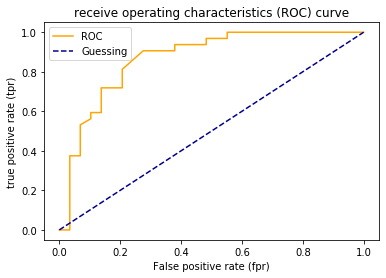

In [126]:
plot(fpr,tpr)

1.0

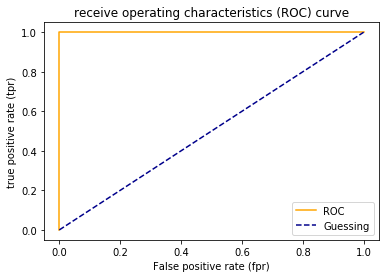

In [128]:
from sklearn.metrics import roc_auc_score
roc_auc_score(y_test,y_probs_positive)
fpr,tpr,threshold=roc_curve(y_test,y_test)
plot(fpr,tpr)
roc_auc_score(y_test,y_test)


# evaluating a classification model 4

In [ ]:
from sklearn.metrics import confusion_matrix
y_preds=clf.predict(x_test)
confusion_matrix(y_test,y_preds)

In [131]:
pd.crosstab(y_test,y_preds,rownames=["actual labels"],colnames=["predicted labels"])


predicted labels,0,1
actual labels,,
0,23,6
1,6,26


In [143]:
import sys
!conda install --yes  --prefix{sys.prefix}seaborn # attack ss of cmd

usage: conda-script.py [-h] [-V] command ...
conda-script.py: error: unrecognized arguments: --prefixC:\Users\hp\Desktop\sample_project\envseaborn


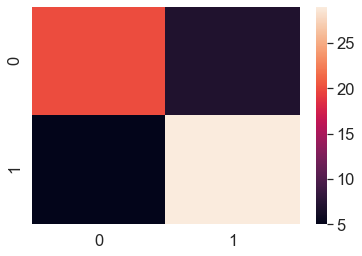

In [22]:
#make our confusion matrix look more visually with seaborn heatmap
import seaborn as sns
sns.set(font_scale=1.5)
conf_mat=confusion_matrix(y_test,y_preds)
sns.heatmap(conf_mat);

# model 5

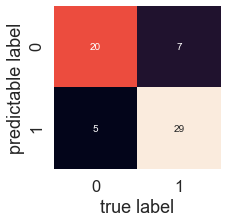

In [31]:
def plot_conf_mat(conf_mat):
    """
    plots of confusion matrix
    """
    fig,ax=plt.subplots(figsize=(3,3))
    ax=sns.heatmap(conf_mat,annot=True,cbar=False)
    plt.xlabel("true label")
    plt.ylabel("predictable label")
    bottom,top=ax.get_ylim()
    #ax.set_ylim(bottom+0.5,top-0.5)
plot_conf_mat(conf_mat)

# model 6


In [32]:
#classfication report
from sklearn.metrics import classification_report
print(classification_report(y_test,y_preds))


              precision    recall  f1-score   support

           0       0.80      0.74      0.77        27
           1       0.81      0.85      0.83        34

    accuracy                           0.80        61
   macro avg       0.80      0.80      0.80        61
weighted avg       0.80      0.80      0.80        61



In [38]:
diseases_true=np.zeros(100000)
diseases_true[0]=1
diseases_preds=np.zeros(100000)
pd.DataFrame(classification_report(diseases_true,diseases_preds,output_dict=True,zero_division=0))

,0.0,1.0,accuracy,macro avg,weighted avg
precision,0.999990,0.0,0.99999,0.499995,0.999980
recall,1.000000,0.0,0.99999,0.500000,0.999990
f1-score,0.999995,0.0,0.99999,0.499997,0.999985
support,99999.000000,1.0,0.99999,100000.000000,100000.000000


# evaluating a regression model 1


In [43]:
from sklearn.ensemble import RandomForestRegressor
np.random.seed(42)
x=boston_df.drop("target",axis=1)
y=boston_df["target"]
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2)
model=RandomForestRegressor()
model.fit(x_train,y_train)
model.score(x_test,y_test)

0.873969014117403

In [46]:
from sklearn.metrics import r2_score
y_testm=np.full(len(y_test),y_test.mean())
y_testm

array([21.48823529, 21.48823529, 21.48823529, 21.48823529, 21.48823529,
       21.48823529, 21.48823529, 21.48823529, 21.48823529, 21.48823529,
       21.48823529, 21.48823529, 21.48823529, 21.48823529, 21.48823529,
       21.48823529, 21.48823529, 21.48823529, 21.48823529, 21.48823529,
       21.48823529, 21.48823529, 21.48823529, 21.48823529, 21.48823529,
       21.48823529, 21.48823529, 21.48823529, 21.48823529, 21.48823529,
       21.48823529, 21.48823529, 21.48823529, 21.48823529, 21.48823529,
       21.48823529, 21.48823529, 21.48823529, 21.48823529, 21.48823529,
       21.48823529, 21.48823529, 21.48823529, 21.48823529, 21.48823529,
       21.48823529, 21.48823529, 21.48823529, 21.48823529, 21.48823529,
       21.48823529, 21.48823529, 21.48823529, 21.48823529, 21.48823529,
       21.48823529, 21.48823529, 21.48823529, 21.48823529, 21.48823529,
       21.48823529, 21.48823529, 21.48823529, 21.48823529, 21.48823529,
       21.48823529, 21.48823529, 21.48823529, 21.48823529, 21.48

In [47]:
r2_score(y_test,y_testm)

0.0

# model 2

In [48]:
#mean absolute error
from sklearn.metrics import mean_absolute_error
y_preds=model.predict(x_test)
mae=mean_absolute_error(y_test,y_preds)
mae

2.1226372549019623

In [55]:
df=pd.DataFrame(data={"actual value":y_test,
                     "predicted value":y_preds})
df["differences"]=df["predicted value"]-df["actual value"]
df

,actual value,predicted value,differences
173,23.6,23.002,-0.598
274,32.4,30.826,-1.574
491,13.6,16.734,3.134
72,22.8,23.467,0.667
452,16.1,16.853,0.753
...,...,...,...
412,17.9,13.030,-4.870
436,9.6,12.490,2.890
411,17.2,13.406,-3.794
86,22.5,20.219,-2.281


# model3  - mean squared error(MSE)

In [56]:
from sklearn.metrics import mean_squared_error
y_preds=model.predict(x_test)
mse=mean_squared_error(y_test,y_preds)
mse

9.242328990196082

In [57]:
s=np.square(df["differences"])
s


173     0.357604
274     2.477476
491     9.821956
72      0.444889
452     0.567009
         ...    
412    23.716900
436     8.352100
411    14.394436
86      5.202961
75      6.240004
Name: differences, Length: 102, dtype: float64

# Evaluating a model with cross validation

In [70]:
#using scoring parameter
from sklearn.model_selection import cross_val_score
from sklearn.ensemble import RandomForestClassifier
np.random.seed(42)
x=heart.drop("target",axis=1)
y=heart["target"]
clf=RandomForestClassifier()
cv_acc=cross_val_score(clf,x,y,cv=5)
cv_acc

array([0.81967213, 0.90163934, 0.83606557, 0.78333333, 0.78333333])

In [73]:
print(f"the cross validation accuracy is:{np.mean(cv_acc*100):2f}%")

the cross validation accuracy is:82.480874%


In [76]:
np.random.seed(42)
cv_acc=cross_val_score(clf,x,y,cv=5,scoring="accuracy")
print(f"The cross validated accuracy score is:{np.mean(cv_acc)*100:2f}%")



The cross validated accuracy score is:82.480874%


In [78]:
cv_precision=cross_val_score(clf,x,y,cv=5,scoring="precision")
np.mean(cv_precision)

0.8209201193072161

In [79]:
cv_recall=cross_val_score(clf,x,y,cv=5,scoring="recall")
np.mean(cv_recall)

0.8484848484848484

In [80]:
cv_f1=cross_val_score(clf,x,y,cv=5,scoring='f1')
np.mean(cv_f1)

0.8455032904593217

In [82]:
from sklearn.model_selection import cross_val_score
from sklearn.ensemble import RandomForestRegressor
np.random.seed(42)
x=boston_df.drop("target",axis=1)
y=boston_df["target"]
model=RandomForestRegressor()
cv_r2=cross_val_score(model,x,y,cv=5,scoring=None)
cv_r2

array([0.76861165, 0.85851765, 0.74941131, 0.47891315, 0.25642166])

In [83]:
cv_r2=cross_val_score(model,x,y,cv=5,scoring="r2")
cv_r2

array([0.76782003, 0.86147444, 0.73098278, 0.46688116, 0.32648691])

In [84]:
cv_mae=cross_val_score(model,x,y,cv=5,scoring="neg_mean_absolute_error")
cv_mae

array([-2.06211765, -2.5060396 , -3.35824752, -3.81479208, -3.20442574])

In [85]:
#mean squared error
cv_mse=cross_val_score(model,x,y,cv=5,scoring="neg_mean_squared_error")
cv_mse

array([ -7.39124675, -12.80369927, -21.44045174, -46.88481495,
       -19.38141243])

In [86]:
np.mean(cv_mse)

-21.580325026247316

# Evaluating a model with sk function

In [88]:
from sklearn.metrics import accuracy_score,precision_score,recall_score,f1_score
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
np.random.seed(42)
x=heart.drop("target",axis=1)
y=heart["target"]
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2)
clf=RandomForestClassifier()
clf.fit(x_train,y_train)
y_preds=clf.predict(x_test)
print("classifier metrics on the tested")
print(f"accuracy:{accuracy_score(y_test,y_preds)*100:2f}%")
print(f"precision:{precision_score(y_test,y_preds)}")
print(f"recall:{recall_score(y_test,y_preds)}")
print(f"F1:{f1_score(y_test,y_preds)}")


classifier metrics on the tested
accuracy:85.245902%
precision:0.8484848484848485
recall:0.875
F1:0.8615384615384615


In [89]:
from sklearn.metrics import r2_score,mean_absolute_error,mean_squared_error
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split
np.random.seed(42)
x=boston_df.drop("target",axis=1)
y=boston_df["target"]
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2)
model=RandomForestRegressor()
model.fit(x_train,y_train)
y_preds=model.predict(x_test)
print("Regression model metrics on the test set")
print(f"R^2:{r2_score(y_test,y_preds)}")
print(f"MAE:{mean_absolute_error(y_test,y_preds)}")
print(f"MSE:{mean_squared_error(y_test,y_preds)}")



Regression model metrics on the test set
R^2:0.8739690141174031
MAE:2.1226372549019623
MSE:9.242328990196082


# improving a ML model

In [90]:
from sklearn.ensemble import RandomForestClassifier
clf=RandomForestClassifier()
clf.get_params()

{'bootstrap': True,
 'ccp_alpha': 0.0,
 'class_weight': None,
 'criterion': 'gini',
 'max_depth': None,
 'max_features': 'auto',
 'max_leaf_nodes': None,
 'max_samples': None,
 'min_impurity_decrease': 0.0,
 'min_impurity_split': None,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'n_estimators': 100,
 'n_jobs': None,
 'oob_score': False,
 'random_state': None,
 'verbose': 0,
 'warm_start': False}

##imporving by tuning hyperparameter
### 3 ways
  #*by hand
  #*Random searchCV function
  #*Grid Search CV

In [92]:
#tuning hyperparameter
clf.get_params()

{'bootstrap': True,
 'ccp_alpha': 0.0,
 'class_weight': None,
 'criterion': 'gini',
 'max_depth': None,
 'max_features': 'auto',
 'max_leaf_nodes': None,
 'max_samples': None,
 'min_impurity_decrease': 0.0,
 'min_impurity_split': None,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'n_estimators': 100,
 'n_jobs': None,
 'oob_score': False,
 'random_state': None,
 'verbose': 0,
 'warm_start': False}

In [94]:
def evaluate_preds(y_true,y_preds):
    """
    perform evaluation comparison on y-true labels vs y_preds labels
    """
    accuracy=accuracy_score(y_true,y_preds)
    precision=precision_score(y_true,y_preds)
    recall=recall_score(y_true,y_preds)
    f1=f1_score(y_true,y_preds)
    metric_dict={"accuracy":round(accuracy,2),
                 "precision":round(precision,2),
                 "recall":round(recall,2),
                "f1":round(f1,2)}
    print(f"accuracy:{accuracy*100:2f}%")
    print("Precision:{precision:2f}")
    print("recall:{recall:2f}")
    print("f1 score:{f1:2f}")
    return metric_dict
    

In [98]:
from sklearn.ensemble import RandomForestClassifier
np.random.seed(42)
heart=heart.sample(frac=1)
x=heart.drop("target",axis=1)
y=heart["target"]
train_split=round(0.7*len(heart))
valid_split=round(train_split+0.15*len(heart))
x_train,y_train=x[:train_split],y[:train_split]
x_valid,y_valid=x[train_split:valid_split],y[train_split:valid_split]
x_test,y_test=x[valid_split:],y[:valid_split]
len(x_train),len(x_valid),len(x_test)
clf=RandomForestClassifier()
clf.fit(x_train,y_train)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

In [99]:
clf.get_params

<bound method BaseEstimator.get_params of RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)>

In [100]:
clf.fit(x_train,y_train)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

In [101]:
y_preds=clf.predict(x_valid)
baseline_metrics=evaluate_preds(y_valid,y_preds)
baseline_metrics

accuracy:80.000000%
Precision:{precision:2f}
recall:{recall:2f}
f1 score:{f1:2f}


{'accuracy': 0.8, 'precision': 0.86, 'recall': 0.83, 'f1': 0.85}

In [103]:
#varying the hyperparameter n_estimator
np.random.seed(42)
clf_2=RandomForestClassifier(n_estimators=10)
clf_2.fit(x_train,y_train)
y_preds2=clf_2.predict(x_valid)
clf_2_metrics=evaluate_preds(y_valid,y_preds2)


accuracy:84.444444%
Precision:{precision:2f}
recall:{recall:2f}
f1 score:{f1:2f}


In [104]:
clf_3=RandomForestClassifier(max_depth=10)
clf_3.fit(x_train,y_train)
y_preds=clf_3.predict(x_valid)
clf_3_metrics=evaluate_preds(y_valid,y_preds)

accuracy:86.666667%
Precision:{precision:2f}
recall:{recall:2f}
f1 score:{f1:2f}


# part 2 - Tuning parameter

In [157]:
#tuning hyper parameter with RandomizedSearchCV
from sklearn.model_selection import RandomizedSearchCV
grid={"n_estimators":[10,100,500,1000,1200],
     "max_depth":[None,5,10,20,30],
     "max_features":["auto","sqrt"],
     "min_samples_split":[2,4,6],
     "min_samples_leaf":[1,2,4]}
np.random.seed(42)
x=heart.drop("target",axis=1)
y=heart["target"]
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2)
cl=RandomForestClassifier(n_jobs=1)
rs_df=RandomizedSearchCV(estimator=cl,
                        param_distributions=grid,
                        n_iter=10,
                        cv=5,
                        verbose=2)
rs_df.fit(x_train,y_train);

Fitting 5 folds for each of 10 candidates, totalling 50 fits
[CV] n_estimators=10, min_samples_split=2, min_samples_leaf=4, max_features=auto, max_depth=5 
[CV]  n_estimators=10, min_samples_split=2, min_samples_leaf=4, max_features=auto, max_depth=5, total=   0.0s
[CV] n_estimators=10, min_samples_split=2, min_samples_leaf=4, max_features=auto, max_depth=5 
[CV]  n_estimators=10, min_samples_split=2, min_samples_leaf=4, max_features=auto, max_depth=5, total=   0.0s
[CV] n_estimators=10, min_samples_split=2, min_samples_leaf=4, max_features=auto, max_depth=5 
[CV]  n_estimators=10, min_samples_split=2, min_samples_leaf=4, max_features=auto, max_depth=5, total=   0.0s
[CV] n_estimators=10, min_samples_split=2, min_samples_leaf=4, max_features=auto, max_depth=5 
[CV]  n_estimators=10, min_samples_split=2, min_samples_leaf=4, max_features=auto, max_depth=5, total=   0.0s
[CV] n_estimators=10, min_samples_split=2, min_samples_leaf=4, max_features=auto, max_depth=5 
[CV]  n_estimators=10, m

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s


[CV]  n_estimators=100, min_samples_split=2, min_samples_leaf=2, max_features=auto, max_depth=10, total=   0.3s
[CV] n_estimators=100, min_samples_split=2, min_samples_leaf=2, max_features=auto, max_depth=10 
[CV]  n_estimators=100, min_samples_split=2, min_samples_leaf=2, max_features=auto, max_depth=10, total=   0.2s
[CV] n_estimators=100, min_samples_split=2, min_samples_leaf=2, max_features=auto, max_depth=10 
[CV]  n_estimators=100, min_samples_split=2, min_samples_leaf=2, max_features=auto, max_depth=10, total=   0.3s
[CV] n_estimators=100, min_samples_split=2, min_samples_leaf=2, max_features=auto, max_depth=10 
[CV]  n_estimators=100, min_samples_split=2, min_samples_leaf=2, max_features=auto, max_depth=10, total=   0.3s
[CV] n_estimators=100, min_samples_split=2, min_samples_leaf=2, max_features=auto, max_depth=10 
[CV]  n_estimators=100, min_samples_split=2, min_samples_leaf=2, max_features=auto, max_depth=10, total=   0.3s
[CV] n_estimators=10, min_samples_split=4, min_sampl

[Parallel(n_jobs=1)]: Done  50 out of  50 | elapsed:   43.0s finished


In [164]:
rs_df.best_params_

{'n_estimators': 10,
 'min_samples_split': 4,
 'min_samples_leaf': 4,
 'max_features': 'auto',
 'max_depth': 30}

In [165]:
rs_y_preds=rs_df.predict(x_test)
rs_metrics=evaluate_preds(y_test,rs_y_preds)

accuracy:95.081967%
Precision:{precision:2f}
recall:{recall:2f}
f1 score:{f1:2f}


# part 3-hyperparameter tuning with GridSearchcv

In [144]:
grid

{'n_estimators': [10],
 'max_depth': [None],
 'max_featured': ['auto', 'sqrt'],
 'min_sample_split': [2, 4, 6],
 'min_samples_leaf': [1, 2, 4]}

In [151]:
grid_2={"n_estimators":[100,200,500],
        "max_depth":[None],
        "max_features":["auto","sqrt"],
        "min_samples_split":[6],
        "min_samples_leaf":[1,2]}

In [152]:
from sklearn.model_selection import GridSearchCV,train_test_split
np.random.seed(42)
x=heart.drop("target",axis=1)
y=heart["target"]
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2)
clf=RandomForestClassifier(n_jobs=1)
gs_clf=GridSearchCV(estimator=clf,param_grid=grid_2,cv=5,verbose=2)
gs_clf.fit(x_train,y_train);


Fitting 5 folds for each of 12 candidates, totalling 60 fits
[CV] max_depth=None, max_features=auto, min_samples_leaf=1, min_samples_split=6, n_estimators=100 


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


[CV]  max_depth=None, max_features=auto, min_samples_leaf=1, min_samples_split=6, n_estimators=100, total=   0.3s
[CV] max_depth=None, max_features=auto, min_samples_leaf=1, min_samples_split=6, n_estimators=100 


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.2s remaining:    0.0s


[CV]  max_depth=None, max_features=auto, min_samples_leaf=1, min_samples_split=6, n_estimators=100, total=   0.3s
[CV] max_depth=None, max_features=auto, min_samples_leaf=1, min_samples_split=6, n_estimators=100 
[CV]  max_depth=None, max_features=auto, min_samples_leaf=1, min_samples_split=6, n_estimators=100, total=   0.3s
[CV] max_depth=None, max_features=auto, min_samples_leaf=1, min_samples_split=6, n_estimators=100 
[CV]  max_depth=None, max_features=auto, min_samples_leaf=1, min_samples_split=6, n_estimators=100, total=   0.2s
[CV] max_depth=None, max_features=auto, min_samples_leaf=1, min_samples_split=6, n_estimators=100 
[CV]  max_depth=None, max_features=auto, min_samples_leaf=1, min_samples_split=6, n_estimators=100, total=   0.3s
[CV] max_depth=None, max_features=auto, min_samples_leaf=1, min_samples_split=6, n_estimators=200 
[CV]  max_depth=None, max_features=auto, min_samples_leaf=1, min_samples_split=6, n_estimators=200, total=   0.6s
[CV] max_depth=None, max_features=

[Parallel(n_jobs=1)]: Done  60 out of  60 | elapsed:   41.2s finished


In [160]:
gs_clf.best_params_

{'max_depth': None,
 'max_features': 'sqrt',
 'min_samples_leaf': 2,
 'min_samples_split': 6,
 'n_estimators': 100}

In [162]:
gs_y_preds=gs_clf.predict(x_test)
gs_metrics=evaluate_preds(y_test,gs_y_preds)

accuracy:88.524590%
Precision:{precision:2f}
recall:{recall:2f}
f1 score:{f1:2f}


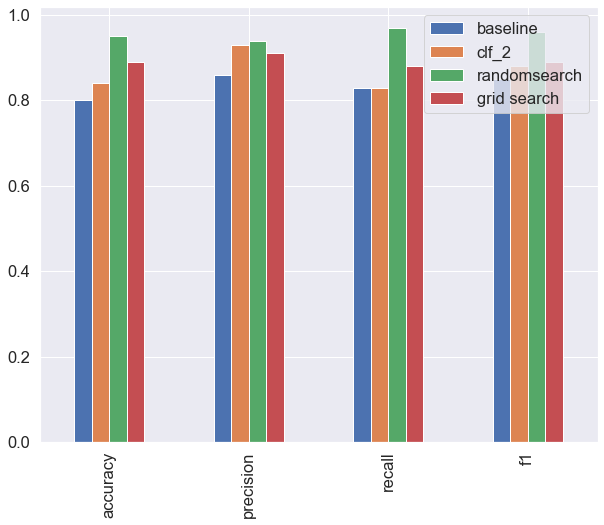

In [166]:
#let's compare different model metrics
compare_metrics=pd.DataFrame({"baseline":baseline_metrics,
                              "clf_2":clf_2_metrics,
                               "randomsearch":rs_metrics,
                               "grid search":gs_metrics})
compare_metrics.plot.bar(figsize=(10,8))

# saving and loading a model

In [167]:
import pickle
pickle.dump(gs_clf,open("random_forest.pkl","wb"))

In [168]:
#load a saved model
loaded=pickle.load(open("random_forest.pkl","rb"))

In [169]:
from sklearn.model_selection import GridSearchCV,train_test_split
np.random.seed(42)
x=heart.drop("target",axis=1)
y=heart["target"]
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2)
pickle_y_preds=loaded.predict(x_test)
evaluate_preds(y_test,pickle_y_preds)

accuracy:88.524590%
Precision:{precision:2f}
recall:{recall:2f}
f1 score:{f1:2f}


{'accuracy': 0.89, 'precision': 0.91, 'recall': 0.88, 'f1': 0.89}

# joblib

In [170]:
from joblib import dump,load
dump(gs_clf,filename="random_forest.joblib")

['random_forest.joblib']

In [171]:
#import saved joblib
loaded_joblib=load(filename="random_forest.joblib")

In [173]:
joblib_y_preds=loaded_joblib.predict(x_test)
evaluate_preds(y_test,joblib_y_preds)

accuracy:88.524590%
Precision:{precision:2f}
recall:{recall:2f}
f1 score:{f1:2f}


{'accuracy': 0.89, 'precision': 0.91, 'recall': 0.88, 'f1': 0.89}

# Putting it all together

In [176]:
#sklearn pipeline
import pandas as pd
data=pd.read_csv("car-data.csv")
data

,Make,Colour,Odometer (KM),Doors,Price
0,Honda,White,45.0,4.0,15323.0
1,BMW,Blue,67.0,5.0,19943.0
2,Honda,White,234.0,4.0,28343.0
3,Toyota,White,34555.0,4.0,13434.0
4,Nissan,Blue,56.0,3.0,14043.0
...,...,...,...,...,...
995,Toyota,Black,35820.0,4.0,32042.0
996,NaN,White,155144.0,3.0,5716.0
997,Nissan,Blue,66604.0,4.0,31570.0
998,Honda,White,215883.0,4.0,4001.0


In [177]:
data.dtypes

Make              object
Colour            object
Odometer (KM)    float64
Doors            float64
Price            float64
dtype: object

In [178]:
data.isna().sum()

Make             49
Colour           50
Odometer (KM)    58
Doors            50
Price            50
dtype: int64

#steps we need to do
 #**filling missing data
 #**convert data to numbers
 #**build a model on the  data

In [2]:
import pandas as pd
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import OneHotEncoder
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split,GridSearchCV
import numpy as np
np.random.seed(42)
data=pd.read_csv("car-data.csv")
data.dropna(subset=["Price"],inplace=True)
categorical_features=["Make","Colour"]
categorical_transformer=Pipeline(steps=[("imputer",SimpleImputer(strategy="constant",fill_value="missing")),
                                        ("onehot",OneHotEncoder(handle_unknown="ignore"))])
door_features=["Doors"]
door_transformer=Pipeline(steps=[("imputer",SimpleImputer(strategy="constant",fill_value=4))])
numeric_features=["Odometer (KM)"]
numeric_transformer=Pipeline(steps=[("imputer",SimpleImputer(strategy="mean"))])
preprocessor=ColumnTransformer(transformers=[
    ("cat",categorical_transformer,categorical_features),("door",door_transformer,door_features),("num",numeric_transformer,numeric_features)
])
model=Pipeline(steps=[("Preprocessor",preprocessor),("model",RandomForestRegressor())])
x=data.drop("Price",axis=1)
y=data["Price"]
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2)
model.fit(x_train,y_train)
model.score(x_test,y_test)



0.22278846485964068

# part 2

In [3]:
model.get_params().keys()

dict_keys(['memory', 'steps', 'verbose', 'Preprocessor', 'model', 'Preprocessor__n_jobs', 'Preprocessor__remainder', 'Preprocessor__sparse_threshold', 'Preprocessor__transformer_weights', 'Preprocessor__transformers', 'Preprocessor__verbose', 'Preprocessor__cat', 'Preprocessor__door', 'Preprocessor__num', 'Preprocessor__cat__memory', 'Preprocessor__cat__steps', 'Preprocessor__cat__verbose', 'Preprocessor__cat__imputer', 'Preprocessor__cat__onehot', 'Preprocessor__cat__imputer__add_indicator', 'Preprocessor__cat__imputer__copy', 'Preprocessor__cat__imputer__fill_value', 'Preprocessor__cat__imputer__missing_values', 'Preprocessor__cat__imputer__strategy', 'Preprocessor__cat__imputer__verbose', 'Preprocessor__cat__onehot__categories', 'Preprocessor__cat__onehot__drop', 'Preprocessor__cat__onehot__dtype', 'Preprocessor__cat__onehot__handle_unknown', 'Preprocessor__cat__onehot__sparse', 'Preprocessor__door__memory', 'Preprocessor__door__steps', 'Preprocessor__door__verbose', 'Preprocessor__

In [4]:
#using gridsearchcv or randomsearchcv
from sklearn.model_selection import GridSearchCV
pipe_grid={"preprocessor__num__imputer__strategy":['mean','median'],
           "model__n_estimators":[100,1000],
           "model__max_depth":[None,5],
           "model__max_features":["auto"],
           "model__min_samples_split":[2,4]}
gs_model=GridSearchCV(model,pipe_grid,cv=5,verbose=2)
gs_model.fit(x_train,y_train)
gs_model.score(x_test,y_test)

Fitting 5 folds for each of 16 candidates, totalling 80 fits
[CV] model__max_depth=None, model__max_features=auto, model__min_samples_split=2, model__n_estimators=100, preprocessor__num__imputer__strategy=mean 


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


ValueError: Invalid parameter preprocessor for estimator Pipeline(memory=None,
         steps=[('Preprocessor',
                 ColumnTransformer(n_jobs=None, remainder='drop',
                                   sparse_threshold=0.3,
                                   transformer_weights=None,
                                   transformers=[('cat',
                                                  Pipeline(memory=None,
                                                           steps=[('imputer',
                                                                   SimpleImputer(add_indicator=False,
                                                                                 copy=True,
                                                                                 fill_value='missing',
                                                                                 missing_values=nan,
                                                                                 strategy='constant',
                                                                                 verbose=0)),
                                                                  ('onehot',
                                                                   OneHotEncoder(categories='a...
                 RandomForestRegressor(bootstrap=True, ccp_alpha=0.0,
                                       criterion='mse', max_depth=None,
                                       max_features='auto', max_leaf_nodes=None,
                                       max_samples=None,
                                       min_impurity_decrease=0.0,
                                       min_impurity_split=None,
                                       min_samples_leaf=1, min_samples_split=2,
                                       min_weight_fraction_leaf=0.0,
                                       n_estimators=100, n_jobs=None,
                                       oob_score=False, random_state=None,
                                       verbose=0, warm_start=False))],
         verbose=False). Check the list of available parameters with `estimator.get_params().keys()`.